# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for classifying qwerties
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202208

In [1]:
# import libraries
import torch
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
from DUDL_ANN_classifyQwerties import *

/tmp/ipykernel_6710/73952508.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


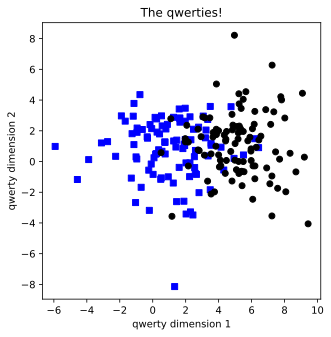

In [2]:
# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

### Check for normalization (data or batch)

In [3]:
from DUDL_metaparams import *

In [16]:
configs = {
    "data":data,
    "labels":labels,

    "device":["cuda"],
    "lr":[1],
    "depth": [2,3,4],
    "_params": [32,128,512],
    "trainDataSize": [.8],
    "trainBatchSize":[128],
    "batchNorm":[False, True],
}

In [17]:
trainaccs, testaccs, trainlosses,testlosses, listOfConfigs, timePerConfig, anns = iterConfigsWithNumepochs(times=10, **configs)

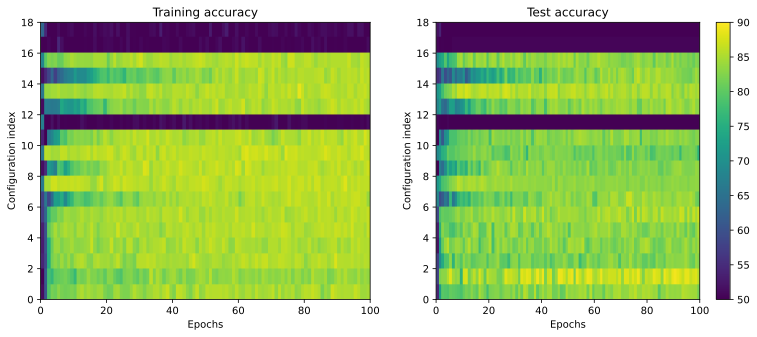

In [18]:
plot2d(trainaccs, testaccs,[0, len(listOfConfigs)])

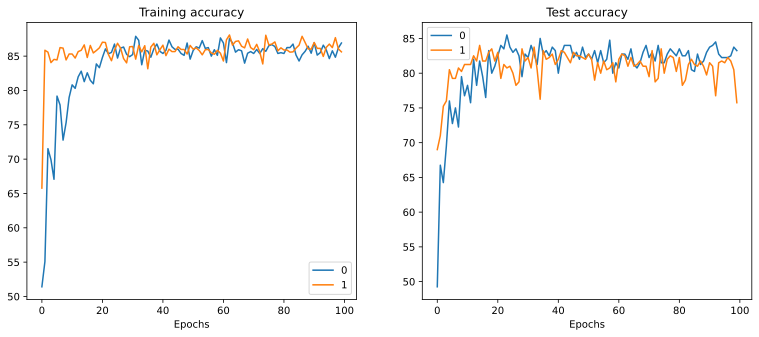

In [63]:
plot2din1d(trainaccs[[8,9],:], testaccs[[8,9],:])

In [51]:
trainmeanlast40 = trainaccs[:,-1]
testmeanlast40 = testaccs[:,-1]

In [52]:
trainmeanlast40.argmax(), testmeanlast40.argmax()

(tensor(8), tensor(5))

In [19]:
printConfigs(**configs)

0 {'device': 'cuda', 'lr': 1, 'depth': 2, '_params': 32, 'trainDataSize': 0.8, 'trainBatchSize': 128, 'batchNorm': False}
1 {'device': 'cuda', 'lr': 1, 'depth': 2, '_params': 32, 'trainDataSize': 0.8, 'trainBatchSize': 128, 'batchNorm': True}
2 {'device': 'cuda', 'lr': 1, 'depth': 2, '_params': 128, 'trainDataSize': 0.8, 'trainBatchSize': 128, 'batchNorm': False}
3 {'device': 'cuda', 'lr': 1, 'depth': 2, '_params': 128, 'trainDataSize': 0.8, 'trainBatchSize': 128, 'batchNorm': True}
4 {'device': 'cuda', 'lr': 1, 'depth': 2, '_params': 512, 'trainDataSize': 0.8, 'trainBatchSize': 128, 'batchNorm': False}
5 {'device': 'cuda', 'lr': 1, 'depth': 2, '_params': 512, 'trainDataSize': 0.8, 'trainBatchSize': 128, 'batchNorm': True}
6 {'device': 'cuda', 'lr': 1, 'depth': 3, '_params': 32, 'trainDataSize': 0.8, 'trainBatchSize': 128, 'batchNorm': False}
7 {'device': 'cuda', 'lr': 1, 'depth': 3, '_params': 32, 'trainDataSize': 0.8, 'trainBatchSize': 128, 'batchNorm': True}
8 {'device': 'cuda', 'lr

In [ ]:
NUMEPOCHS = 8
NUMOFLRS = 8
lrs = torch.linspace(1e-10,2,NUMOFLRS)
epochs = torch.round(torch.linspace(10,500,NUMEPOCHS))

In [ ]:
# accs=calcAccs(lrs,epochs)

In [ ]:
# accs=calcAccs(lrs,epochs,True)

In [ ]:
# accs=calcAccs(lrs,epochs,False,True)

In [ ]:
# accs=calcAccs(lrs,epochs,True,True)

In [ ]:
# fig = plt.figure()
# fig.set_figwidth(10)
# plt.imshow(accs, extent=[lrs[0],lrs[-1],epochs[0],epochs[-1]], origin="lower",aspect = .001)
# plt.xticks(lrs)
# plt.yticks(epochs)
# plt.title(f"{accs.max()}")
# plt.colorbar()
# plt.show()

In [ ]:
# EPOCH = 500
# losses2d = torch.zeros(NUMOFLRS, EPOCH)
# for j,lr in enumerate(lrs):
#     _, losses = test(lr, EPOCH,TIMES)
#     losses2d[j] = losses

In [ ]:
# for i in range(NUMOFLRS):
#     plt.plot(losses2d[i].detach())
# plt.legend(lrs)
# plt.xlabel("epochs")
# plt.ylabel('loss')
# plt.xticks(torch.arange(0, EPOCH+1,100))
# plt.show()

In [ ]:
# for i in range(NUMOFLRS):
#     plt.plot(epochs, accs[:,i])
# plt.legend(lrs)
# plt.xlabel("epochs")
# plt.ylabel('accuracy')
# plt.xticks(epochs)
# plt.show()

In [ ]:
# model = torch.load("qwerty_multilayer.pt")


In [ ]:
classifier = QwertyClassifier(1.1, 400)
classifier.train(data,labels)
predlabels, misclassified, totalacc = classifier.eval(data,labels)
print('Final accuracy: %g%%' %totalacc)

In [ ]:
torch.save(classifier.model.state_dict(),PATH)

In [ ]:
classifier = QwertyClassifier(.2, 400)
classifier.model.load_state_dict(torch.load(PATH))
predlabels, misclassified, totalacc = classifier.eval(data,labels)
print('Final accuracy: %g%%' %totalacc)

In [ ]:
classifier.train(data,labels)
predlabels, misclassified, totalacc = classifier.eval(data,labels)
print('Final accuracy: %g%%' %totalacc)

In [ ]:
# show the losses

plt.plot(classifier.losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [61]:
# Use the ann with the top test acc (This code piece is from metaparams)
clsTop = anns[5]
preds = clsTop.model(data.to(device="cuda"))
totalacc = clsTop.getAcc(preds, labels.to(device="cuda"))
predlabels = clsTop.labelfun(preds)
misclassified = torch.where(predlabels != labels.to(device="cuda"))[0]


totalacc = totalacc.to(device="cpu")
predlabels = predlabels.to(device="cpu")
misclassified = misclassified.to(device="cpu")

In [65]:
anns[-1].print()

ANNModel(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Dropout(p=0, inplace=False)
    (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Linear(in_features=512, out_features=512, bias=True)
    (9): ReLU()
    (10): Dropout(p=0, inplace=False)
    (11): Linear(in_features=512, out_features=1, bias=True)
  )
)
layers.0.weight torch.Size([512, 2]) 1024
layers.0.bias torch.Size([512]) 512
layers.3.weight torch.Size([512]) 512
layers.3.bias torch.Size([512]) 512
layers.4.weight torch.Size([512, 512]) 262144
layers.4.bias torch.Size([512]) 512
layers.7.weight torch.Size([512]) 512
layers.7.bias torch.Size([512]) 512
layers.8.weight torch.Size([512, 512]) 262144
layers.8.bias torch.S

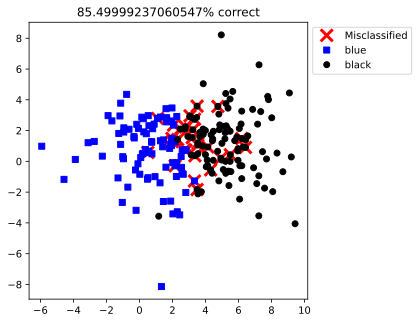

In [62]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

In [ ]:
torch.save(model.state_dict(),PATH)

# Additional explorations

In [ ]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.
# 
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the 
#    qwerty-generating code to get the model to have 100% classification accuracy.
# 